In [1]:
# Best to read the BASIC example first before trying to understand this one.

In [2]:
%load_ext autoreload
%autoreload 2
from contexttimer import Timer
import numpy as np
import pandas as pd
import motorshed

import PIL.Image
from io import BytesIO
import IPython.display
import numpy as np
def showarray(a, fmt='png'):
    """Convenience fxn to render a bytes array (default png format) in a notebook."""
    a = np.uint8(a)
    with BytesIO() as f:
        PIL.Image.fromarray(a).save(f, fmt)
        IPython.display.display(IPython.display.Image(data=f.getvalue()))


In [3]:
# DEFINE what map to show.

# New York Stock Exchange
address = '11 Wall Street New York, NY'
distance = 5_000


# White House
# address = '1600 Pennsylvania Avenue, Washington DC'
# distance = 5_000

In [4]:
with Timer(prefix="AWAY from origin"):
    towards_origin = False

    with Timer(prefix="Get map"):
        G, center_node, origin_point = motorshed.overpass.get_map(
            address, distance=distance
        )

    with Timer(prefix="Get transit times"):
        motorshed.osrm.get_transit_times(G, center_node, towards_origin=towards_origin)

    Gn, Ge = motorshed.algos.gen2.create_initial_dataframes(
        G, towards_origin=towards_origin
    )
    assert (Gn.calculated == False).all()
    (Ge.through_traffic == 0).all()

    Ge, Gn = motorshed.algos.gen2.initial_routing(Ge, Gn)

    Ge, Gn = motorshed.algos.gen2.followup_heuristic_routing(Ge, Gn)

    Ge = motorshed.algos.gen2.followup_osrm_routing_parallel(
        G, Ge, Gn, center_node, towards_origin=towards_origin
    )

    Gge = motorshed.algos.gen2.propagate_edges(Ge)

    # if not towards_origin:
    #     Gge[['u', 'v']] = Gge[['v', 'u']]

    Gge_reverse = Gge.copy()

Cache miss. Loading.
here
here
here
Get map took 11.689 seconds
osrm table api took 0.232 seconds
osrm table api took 0.158 seconds
osrm table api took 0.173 seconds
osrm table api took 0.167 seconds
osrm table api took 0.153 seconds
osrm table api took 0.160 seconds
osrm table api took 0.167 seconds
osrm table api took 0.176 seconds
osrm table api took 0.146 seconds
osrm table api took 0.154 seconds
osrm table api took 0.174 seconds
osrm table api took 0.152 seconds
osrm table api took 0.144 seconds
osrm table api took 0.171 seconds
osrm table api took 0.141 seconds
osrm table api took 0.209 seconds
osrm table api took 0.154 seconds
osrm table api took 0.156 seconds
osrm table api took 0.143 seconds
osrm table api took 0.148 seconds
osrm table api took 0.145 seconds
osrm table api took 0.160 seconds
osrm table api took 0.163 seconds
osrm table api took 0.146 seconds
osrm table api took 0.145 seconds
osrm table api took 0.208 seconds
osrm table api took 0.154 seconds
osrm table api too

/Users/rdchambers/opt/anaconda3/envs/motorshed/lib/python3.8/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/rdchambers/opt/anaconda3/envs/motorshed/lib/python3.8/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
100/2006
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
200/2006
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workabl

Couldnt find workable option by n==3
1300/2006
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
1400/2006
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
1500/2006
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt 

Edges to propagate: 1867. Traffic: 50. Cars on road: 94503.
Edges to propagate: 1842. Traffic: 51. Cars on road: 94352.
Edges to propagate: 1818. Traffic: 51. Cars on road: 94220.
Edges to propagate: 1795. Traffic: 52. Cars on road: 94125.
Edges to propagate: 1772. Traffic: 53. Cars on road: 93976.
Edges to propagate: 1750. Traffic: 53. Cars on road: 93872.
Edges to propagate: 1730. Traffic: 54. Cars on road: 93793.
Edges to propagate: 1711. Traffic: 54. Cars on road: 93694.
Edges to propagate: 1693. Traffic: 55. Cars on road: 93581.
Edges to propagate: 1675. Traffic: 55. Cars on road: 93466.
Edges to propagate: 1656. Traffic: 56. Cars on road: 93333.
Edges to propagate: 1636. Traffic: 56. Cars on road: 93228.
Edges to propagate: 1617. Traffic: 57. Cars on road: 93120.
Edges to propagate: 1599. Traffic: 58. Cars on road: 92986.
Edges to propagate: 1582. Traffic: 58. Cars on road: 92829.
Edges to propagate: 1566. Traffic: 59. Cars on road: 92699.
Edges to propagate: 1549. Traffic: 59. C

Edges to propagate: 452. Traffic: 114. Cars on road: 51941.
Edges to propagate: 449. Traffic: 115. Cars on road: 51725.
Edges to propagate: 446. Traffic: 115. Cars on road: 51466.
Edges to propagate: 443. Traffic: 115. Cars on road: 51169.
Edges to propagate: 440. Traffic: 115. Cars on road: 50918.
Edges to propagate: 437. Traffic: 115. Cars on road: 50664.
Edges to propagate: 434. Traffic: 115. Cars on road: 50335.
Edges to propagate: 431. Traffic: 116. Cars on road: 50067.
Edges to propagate: 428. Traffic: 116. Cars on road: 49773.
Edges to propagate: 425. Traffic: 116. Cars on road: 49527.
Edges to propagate: 422. Traffic: 116. Cars on road: 49306.
Edges to propagate: 419. Traffic: 116. Cars on road: 49021.
Edges to propagate: 416. Traffic: 116. Cars on road: 48663.
Edges to propagate: 413. Traffic: 117. Cars on road: 48347.
Edges to propagate: 410. Traffic: 116. Cars on road: 47907.
Edges to propagate: 407. Traffic: 116. Cars on road: 47387.
Edges to propagate: 404. Traffic: 116. C

Edges to propagate: 139. Traffic: 18. Cars on road: 2574.
Edges to propagate: 138. Traffic: 17. Cars on road: 2473.
Edges to propagate: 137. Traffic: 17. Cars on road: 2385.
Edges to propagate: 136. Traffic: 17. Cars on road: 2321.
Edges to propagate: 135. Traffic: 17. Cars on road: 2299.
Edges to propagate: 134. Traffic: 16. Cars on road: 2274.
Edges to propagate: 133. Traffic: 16. Cars on road: 2243.
Edges to propagate: 132. Traffic: 16. Cars on road: 2183.
Edges to propagate: 131. Traffic: 16. Cars on road: 2164.
Edges to propagate: 130. Traffic: 16. Cars on road: 2120.
Edges to propagate: 129. Traffic: 16. Cars on road: 2088.
Edges to propagate: 128. Traffic: 16. Cars on road: 2064.
Edges to propagate: 127. Traffic: 16. Cars on road: 2054.
Edges to propagate: 126. Traffic: 16. Cars on road: 2044.
Edges to propagate: 125. Traffic: 16. Cars on road: 2032.
Edges to propagate: 124. Traffic: 16. Cars on road: 2002.
Edges to propagate: 123. Traffic: 16. Cars on road: 1985.
Edges to propa

In [5]:
with Timer(prefix="TOWARDS origin"):
    towards_origin = True

    with Timer(prefix="Get map"):
        G, center_node, origin_point = motorshed.overpass.get_map(
            address, distance=distance
        )

    with Timer(prefix="Get transit times"):
        motorshed.osrm.get_transit_times(G, center_node, towards_origin=towards_origin)

    Gn, Ge = motorshed.algos.gen2.create_initial_dataframes(
        G, towards_origin=towards_origin
    )
    assert (Gn.calculated == False).all()
    (Ge.through_traffic == 0).all()

    Ge, Gn = motorshed.algos.gen2.initial_routing(Ge, Gn)

    Ge, Gn = motorshed.algos.gen2.followup_heuristic_routing(Ge, Gn)

    Ge = motorshed.algos.gen2.followup_osrm_routing_parallel(
        G, Ge, Gn, center_node, towards_origin=towards_origin
    )

    Gge = motorshed.algos.gen2.propagate_edges(Ge)

    if not towards_origin:
        Gge[["u", "v"]] = Gge[["v", "u"]]

    Gge_forward = Gge.copy()

Get map took 0.419 seconds
osrm table api took 0.169 seconds
osrm table api took 0.137 seconds
osrm table api took 0.142 seconds
osrm table api took 0.169 seconds
osrm table api took 0.136 seconds
osrm table api took 0.141 seconds
osrm table api took 0.159 seconds
osrm table api took 0.150 seconds
osrm table api took 0.144 seconds
osrm table api took 0.145 seconds
osrm table api took 0.152 seconds
osrm table api took 0.140 seconds
osrm table api took 0.146 seconds
osrm table api took 0.153 seconds
osrm table api took 0.137 seconds
osrm table api took 0.141 seconds
osrm table api took 0.148 seconds
osrm table api took 0.157 seconds
osrm table api took 0.153 seconds
osrm table api took 0.176 seconds
osrm table api took 0.148 seconds
osrm table api took 0.133 seconds
osrm table api took 0.159 seconds
osrm table api took 0.147 seconds
osrm table api took 0.241 seconds
osrm table api took 0.149 seconds
osrm table api took 0.160 seconds
osrm table api took 0.151 seconds
osrm table api took 0

/Users/rdchambers/opt/anaconda3/envs/motorshed/lib/python3.8/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/rdchambers/opt/anaconda3/envs/motorshed/lib/python3.8/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
100/2011
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option 

Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
1400/2011
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
1500/2011
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
Couldnt find workable option by n==3
1600/2011
Couldnt find workable option by n==3
Couldnt 

Edges to propagate: 1765. Traffic: 54. Cars on road: 96669.
Edges to propagate: 1734. Traffic: 55. Cars on road: 96630.
Edges to propagate: 1704. Traffic: 56. Cars on road: 96600.
Edges to propagate: 1675. Traffic: 57. Cars on road: 96571.
Edges to propagate: 1648. Traffic: 58. Cars on road: 96497.
Edges to propagate: 1623. Traffic: 59. Cars on road: 96416.
Edges to propagate: 1601. Traffic: 60. Cars on road: 96355.
Edges to propagate: 1578. Traffic: 61. Cars on road: 96291.
Edges to propagate: 1555. Traffic: 61. Cars on road: 96241.
Edges to propagate: 1533. Traffic: 62. Cars on road: 96213.
Edges to propagate: 1511. Traffic: 63. Cars on road: 96200.
Edges to propagate: 1489. Traffic: 64. Cars on road: 96181.
Edges to propagate: 1466. Traffic: 65. Cars on road: 96164.
Edges to propagate: 1444. Traffic: 66. Cars on road: 96115.
Edges to propagate: 1421. Traffic: 67. Cars on road: 96048.
Edges to propagate: 1399. Traffic: 68. Cars on road: 96009.
Edges to propagate: 1378. Traffic: 69. C

Edges to propagate: 485. Traffic: 120. Cars on road: 58474.
Edges to propagate: 482. Traffic: 121. Cars on road: 58362.
Edges to propagate: 479. Traffic: 121. Cars on road: 58295.
Edges to propagate: 476. Traffic: 122. Cars on road: 58178.
Edges to propagate: 473. Traffic: 122. Cars on road: 58044.
Edges to propagate: 470. Traffic: 123. Cars on road: 57933.
Edges to propagate: 467. Traffic: 123. Cars on road: 57814.
Edges to propagate: 464. Traffic: 124. Cars on road: 57678.
Edges to propagate: 461. Traffic: 124. Cars on road: 57449.
Edges to propagate: 458. Traffic: 124. Cars on road: 57210.
Edges to propagate: 455. Traffic: 125. Cars on road: 57002.
Edges to propagate: 452. Traffic: 125. Cars on road: 56777.
Edges to propagate: 449. Traffic: 126. Cars on road: 56594.
Edges to propagate: 446. Traffic: 126. Cars on road: 56407.
Edges to propagate: 443. Traffic: 126. Cars on road: 56200.
Edges to propagate: 440. Traffic: 126. Cars on road: 55870.
Edges to propagate: 437. Traffic: 127. C

Edges to propagate: 201. Traffic: 21. Cars on road: 4375.
Edges to propagate: 200. Traffic: 21. Cars on road: 4365.
Edges to propagate: 199. Traffic: 21. Cars on road: 4321.
Edges to propagate: 198. Traffic: 21. Cars on road: 4291.
Edges to propagate: 197. Traffic: 21. Cars on road: 4267.
Edges to propagate: 196. Traffic: 21. Cars on road: 4254.
Edges to propagate: 195. Traffic: 21. Cars on road: 4233.
Edges to propagate: 194. Traffic: 21. Cars on road: 4224.
Edges to propagate: 193. Traffic: 21. Cars on road: 4210.
Edges to propagate: 192. Traffic: 21. Cars on road: 4201.
Edges to propagate: 191. Traffic: 21. Cars on road: 4190.
Edges to propagate: 190. Traffic: 22. Cars on road: 4186.
Edges to propagate: 189. Traffic: 22. Cars on road: 4164.
Edges to propagate: 188. Traffic: 21. Cars on road: 4126.
Edges to propagate: 187. Traffic: 21. Cars on road: 4083.
Edges to propagate: 186. Traffic: 21. Cars on road: 4040.
Edges to propagate: 185. Traffic: 21. Cars on road: 4002.
Edges to propa

In [6]:
# Render the three panes separately
rgba_arr_f = motorshed.render_mpl.render_layer(
    Gn, Gge_forward, center_node, cmap=motorshed.render_mpl.cm_red
)

# motorshed.render_mpl.showarray(rgba_arr_f)

rgba_arr_r = motorshed.render_mpl.render_layer(
    Gn, Gge_reverse, center_node, cmap=motorshed.render_mpl.cm_blue
)

# motorshed.render_mpl.showarray(rgba_arr_r)

rgba_arr = motorshed.render_mpl.combine_layers_max([rgba_arr_f, rgba_arr_r])
# motorshed.render_mpl.showarray(rgba_arr)

fn = ("%s.%s.bi_dir" % (address, distance)).replace(",", "")

fn2 = motorshed.render_mpl.save_layer(fn, rgba_arr)
print(fn2)

Guessing a good max width: 2.7446096173577508 pixels
(1200, 1200, 4)
Guessing a good max width: 2.7446096173577508 pixels
(1200, 1200, 4)
11 Wall Street New York NY.5000.bi_dir.png
PNG took 0.310 seconds
11 Wall Street New York NY.5000.bi_dir.png


11 Wall Street New York NY.5000.bi_dir_tri_pane.png
PNG took 0.891 seconds
11 Wall Street New York NY.5000.bi_dir_tri_pane.png


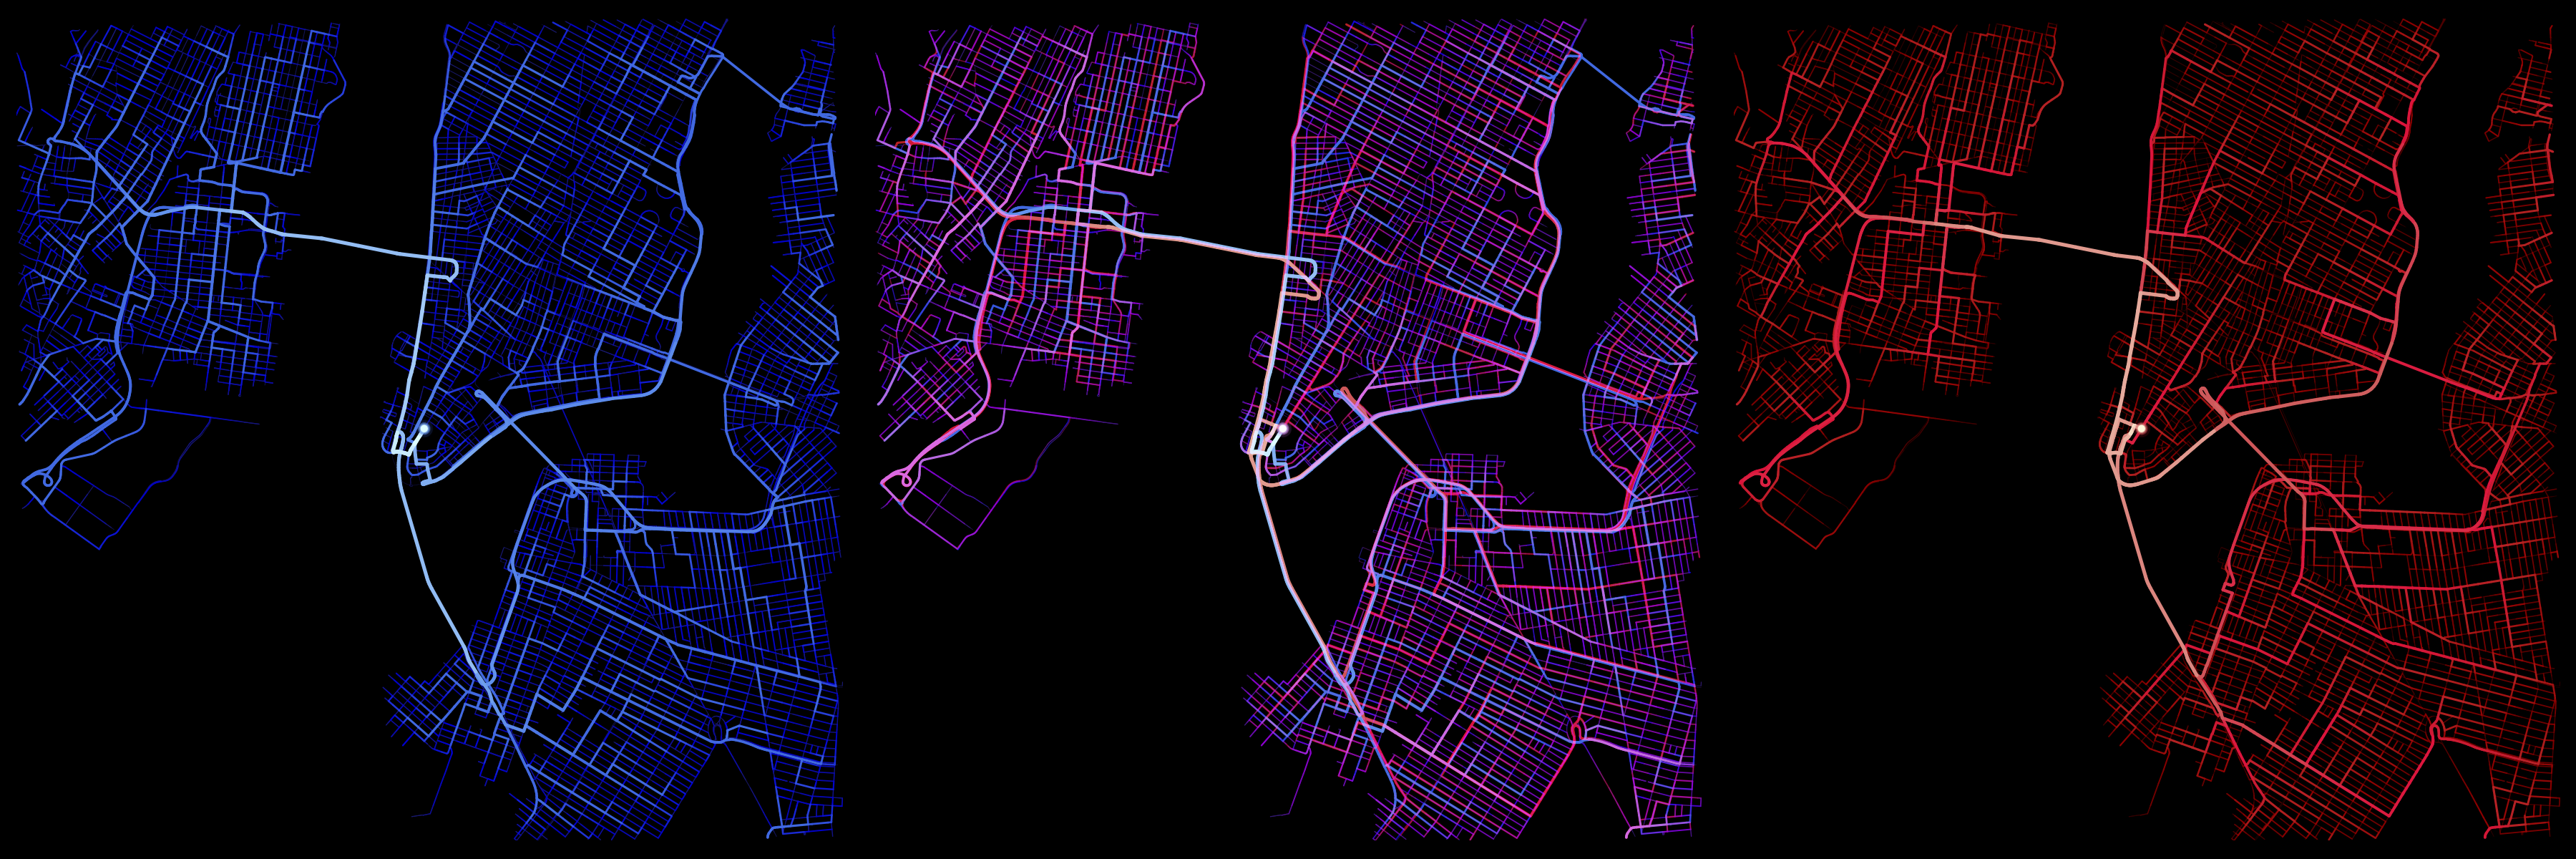

In [7]:
# Now, combine into a single tri-pane and save.

rgba_arr_all = motorshed.render_mpl.concat_layers_horiz(
    [rgba_arr_r, rgba_arr, rgba_arr_f]
)

fn = ("%s.%s.bi_dir_tri_pane" % (address, distance)).replace(",", "")

fn2 = motorshed.render_mpl.save_layer(fn, rgba_arr_all)
print(fn2)

motorshed.render_mpl.showarray(rgba_arr_all[:, :, :])

In [ ]:
%ls -la *bi_dir*